In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('p2')

Mounted at p2


In [3]:
df = pd.read_csv('/content/p2/MyDrive/p2/data/reviews_500k_imba.csv')
df.head()

,business_id,stars,text,categories
0,3uC7Lbc3RgUDTWQlBu4PqQ,5.0,Three words: Damn good pastries.\n\nA few mor...,"['Desserts', 'Food', 'French', 'Sandwiches', '..."
1,c-NXKTJ0jrrusTPxJAUwvA,1.0,Easily one of the worst Red Robin locations. T...,"['American (Traditional)', 'Restaurants', 'Bur..."
2,j3csEfGzkwnXATdRoZDT-A,2.0,Maybe I am just spoiled with good Mexican food...,"['Mexican', 'Restaurants']"
3,Q0EZmATxDphzRMszNV2LVg,5.0,This Wildflower is always kept clean and the e...,"['Food', 'American (New)', 'Restaurants', 'Bre..."
4,25c15dEPrBrWr4tR1r6sTg,5.0,Favorite bibimbap in the valley! They also hav...,"['Korean', 'Japanese', 'Restaurants']"


In [ ]:
df_test = df.head()

In [ ]:
count = df['text'].str.split().str.len()
count

0          44
1          83
2          59
3          42
4          19
         ... 
499995    233
499996    155
499997     41
499998    245
499999     40
Name: text, Length: 500000, dtype: int64

In [ ]:
count.describe()

count    500000.000000
mean        107.941072
std         101.583536
min           1.000000
25%          41.000000
50%          76.000000
75%         139.000000
max        1004.000000
Name: text, dtype: float64

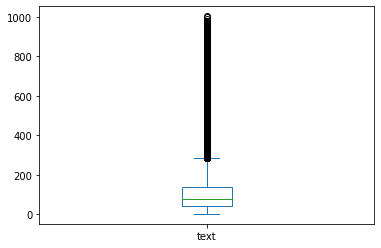

In [ ]:
count.plot.box()

In [ ]:
df_pp = pd.read_csv('/content/p2/MyDrive/p2/data/preprocessed_500k_imba.csv')
df_pp.fillna('', inplace=True)
df_pp.head()

,text,stars,processed_text
0,Three words: Damn good pastries.\n\nA few mor...,4.0,three word damn good pastry word probably best...
1,Easily one of the worst Red Robin locations. T...,0.0,easily one worst red robin location food delic...
2,Maybe I am just spoiled with good Mexican food...,1.0,maybe spoiled good mexican food growing san di...
3,This Wildflower is always kept clean and the e...,4.0,wildflower always kept clean employee nice pot...
4,Favorite bibimbap in the valley! They also hav...,4.0,favorite bibimbap valley also korean fixing sm...


In [ ]:
five_stars = df_pp.loc[df['stars'] == 5.0]
five_stars

,text,stars,processed_text
0,Three words: Damn good pastries.\n\nA few mor...,4.0,three word damn good pastry word probably best...
3,This Wildflower is always kept clean and the e...,4.0,wildflower always kept clean employee nice pot...
4,Favorite bibimbap in the valley! They also hav...,4.0,favorite bibimbap valley also korean fixing sm...
6,It lives up to its reputation. \n\nIncredible ...,4.0,life reputation incredible service atmosphere ...
12,I have stayed here for three days last year an...,4.0,stayed three day last year cool place stay thi...
...,...,...,...
499985,Good food with good service. I like this resta...,4.0,good food good service like restaurant come fr...
499993,Breakfast was deliciously good. Omg them home ...,4.0,breakfast deliciously good omg home fry bell p...
499995,"New Nak Won is amazing!\n\nFirst off, super aw...",4.0,new nak amazing first super awesome transit fr...
499998,"Yesterday I was served Kobe hot dogs, chipotle...",4.0,yesterday served kobe hot dog chipotle jalepen...


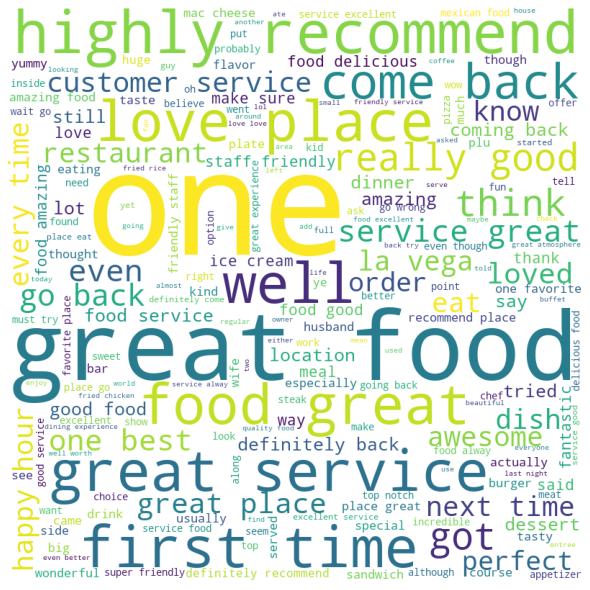

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(five_stars.processed_text))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
one_star = df_pp.loc[df['stars'] == 1.0]
one_star

,text,stars,processed_text
1,Easily one of the worst Red Robin locations. T...,0.0,easily one worst red robin location food delic...
11,Called to place a carry out order and they sai...,0.0,called place carry order said could !take orde...
24,I had a dreadful experience. I called in my o...,0.0,dreadful experience called order told would re...
37,Nasty. The food here is terrible. I got some M...,0.0,nasty food terrible got mac cheese yesterday !...
39,It's like a hike to get from my car to the mil...,0.0,like hike get car milk section clothes tacky p...
...,...,...,...
499943,My husband and I wanted Thai food for our quic...,0.0,husband wanted thai food quick lunch date foun...
499962,Original review:\nJule is run by immature owne...,0.0,original review jule run immature owner respon...
499970,Never again. Very poor service and unfriendly ...,0.0,never !again poor service unfriendly staff sta...
499984,"Have been to this place many, many time sad to...",0.0,place many many time sad say last time !want b...


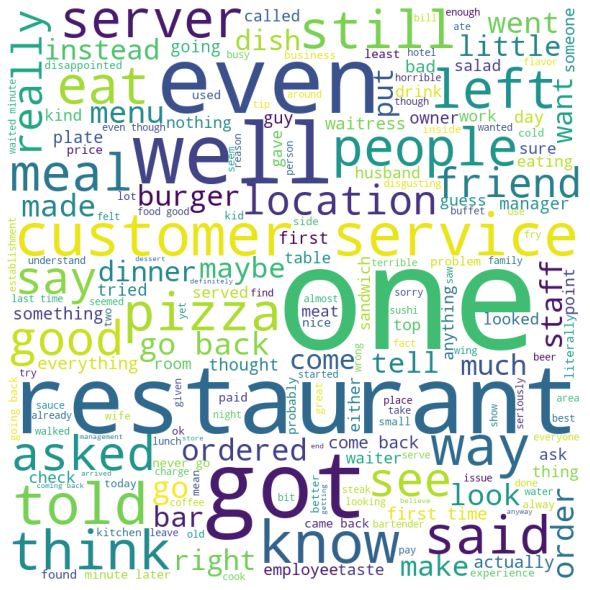

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(one_star.processed_text))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [4]:
import ast

cat = [ast.literal_eval(categories) for categories in df.categories]
cat

[['Desserts', 'Food', 'French', 'Sandwiches', 'Bakeries', 'Restaurants'],
 ['American (Traditional)', 'Restaurants', 'Burgers'],
 ['Mexican', 'Restaurants'],
 ['Food', 'American (New)', 'Restaurants', 'Breakfast & Brunch', 'Bakeries'],
 ['Korean', 'Japanese', 'Restaurants'],
 ['Food', 'Pizza', 'Breweries', 'Restaurants'],
 ['Steakhouses',
  'Food',
  'Specialty Food',
  'Gastropubs',
  'Restaurants',
  'Seafood',
  'Meat Shops'],
 ['Restaurants',
  'Arts & Entertainment',
  'Burgers',
  'Performing Arts',
  'American (Traditional)'],
 ['Asian Fusion', 'Restaurants', 'Seafood', 'Sushi Bars', 'Japanese'],
 ['Ethnic Food',
  'Sandwiches',
  'Food',
  'Flowers & Gifts',
  'Shopping',
  'Restaurants',
  'Specialty Food',
  'Gift Shops',
  'Delis'],
 ['Sushi Bars', 'Restaurants', 'Japanese'],
 ['Desserts', 'Food', 'Sushi Bars', 'Seafood', 'Restaurants', 'Japanese'],
 ['Nightlife',
  'Casinos',
  'Restaurants',
  'Resorts',
  'Arts & Entertainment',
  'Hotels & Travel',
  'Hotels',
  'Event P

In [6]:
from collections import Counter
import itertools

catcounts = Counter(i for i in list(itertools.chain.from_iterable(cat)))

catcounts.most_common(17)

[('Restaurants', 500000),
 ('Food', 135233),
 ('Nightlife', 120330),
 ('Bars', 116214),
 ('American (Traditional)', 87424),
 ('American (New)', 86929),
 ('Breakfast & Brunch', 76806),
 ('Sandwiches', 56426),
 ('Mexican', 48084),
 ('Burgers', 46825),
 ('Pizza', 46677),
 ('Italian', 46508),
 ('Seafood', 40695),
 ('Japanese', 36988),
 ('Event Planning & Services', 35320),
 ('Chinese', 31277),
 ('Sushi Bars', 30274)]

In [7]:
commons = catcounts.most_common(17)

In [11]:
commons = commons[2:]

In [22]:
[dict(commons)[common] for common in dict(commons)]

[120330,
 116214,
 87424,
 86929,
 76806,
 56426,
 48084,
 46825,
 46677,
 46508,
 40695,
 36988,
 35320,
 31277,
 30274]

In [24]:
[common for common in dict(commons)]

['Nightlife',
 'Bars',
 'American (Traditional)',
 'American (New)',
 'Breakfast & Brunch',
 'Sandwiches',
 'Mexican',
 'Burgers',
 'Pizza',
 'Italian',
 'Seafood',
 'Japanese',
 'Event Planning & Services',
 'Chinese',
 'Sushi Bars']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Nightlife'),
 Text(0, 0, 'Bars'),
 Text(0, 0, 'American (Traditional)'),
 Text(0, 0, 'American (New)'),
 Text(0, 0, 'Breakfast & Brunch'),
 Text(0, 0, 'Sandwiches'),
 Text(0, 0, 'Mexican'),
 Text(0, 0, 'Burgers'),
 Text(0, 0, 'Pizza'),
 Text(0, 0, 'Italian'),
 Text(0, 0, 'Seafood'),
 Text(0, 0, 'Japanese'),
 Text(0, 0, 'Event Planning & Services'),
 Text(0, 0, 'Chinese'),
 Text(0, 0, 'Sushi Bars')]

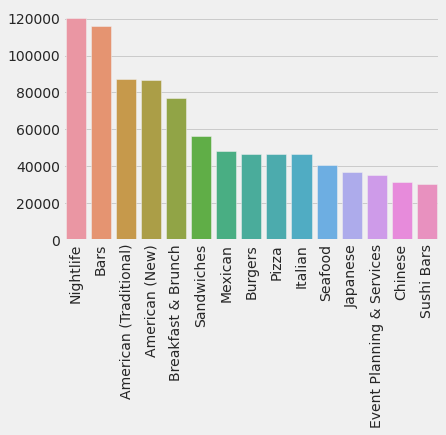

In [31]:
import seaborn as sns
import matplotlib.style as style

style.use('fivethirtyeight')

x = [common for common in dict(commons)]
y = [dict(commons)[common] for common in dict(commons)]

plot = sns.barplot(x, y)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)